# Calidad del dato

In [32]:
import mysql.connector as connection
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

### Sales

In [6]:
try:
    mydb = connection.connect(host="db4free.net", database = 'dbtraining2',user="dbuseracc2", passwd="Pa55w0rd",use_pure=True)
    query = "Select * from sales;"
    sales_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [8]:
sales_df

,orderNumber,orderLineNumber,orderDate,shippedDate,requiredDate,customerNumber,employeeNumber,productCode,status,comments,quantityOrdered,priceEach,sales_amount
0,10100,1,2003-01-06,2003-01-10,2003-01-13,363,1216,S24_3969,Shipped,None,49,35.29,1729.21
1,10100,2,2003-01-06,2003-01-10,2003-01-13,363,1216,S18_2248,Shipped,None,50,55.09,2754.50
2,10100,3,2003-01-06,2003-01-10,2003-01-13,363,1216,S18_1749,Shipped,None,30,136.00,4080.00
3,10100,4,2003-01-06,2003-01-10,2003-01-13,363,1216,S18_4409,Shipped,None,22,75.46,1660.12
4,10101,1,2003-01-09,2003-01-11,2003-01-18,128,1504,S18_2795,Shipped,Check on availability.,26,167.06,4343.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,10425,9,2005-05-31,None,2005-06-07,119,1370,S24_2300,In Process,None,49,127.79,6261.71
2855,10425,10,2005-05-31,None,2005-06-07,119,1370,S18_2432,In Process,None,19,48.62,923.78
2856,10425,11,2005-05-31,None,2005-06-07,119,1370,S32_1268,In Process,None,41,83.79,3435.39
2857,10425,12,2005-05-31,None,2005-06-07,119,1370,S10_4962,In Process,None,38,131.49,4996.62


In [9]:
sales_df.describe()

,orderNumber,orderLineNumber,customerNumber,employeeNumber,quantityOrdered,priceEach,sales_amount
count,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000
mean,10262.681007,6.416229,259.523260,1380.933193,35.184680,90.699451,3199.398580
std,92.151367,4.179354,118.689272,156.604464,9.866436,36.571590,1633.220486
min,10100.000000,1.000000,103.000000,1165.000000,6.000000,26.550000,481.500000
25%,10182.000000,3.000000,144.000000,1216.000000,27.000000,62.000000,1985.100000
50%,10267.000000,6.000000,240.000000,1370.000000,35.000000,85.860000,2879.800000
75%,10340.000000,9.000000,350.000000,1501.000000,43.000000,114.590000,4086.800000
max,10425.000000,18.000000,496.000000,1702.000000,97.000000,214.300000,11503.140000


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      2859 non-null   int64  
 1   orderLineNumber  2859 non-null   int64  
 2   orderDate        2859 non-null   object 
 3   shippedDate      2718 non-null   object 
 4   requiredDate     2859 non-null   object 
 5   customerNumber   2859 non-null   int64  
 6   employeeNumber   2859 non-null   int64  
 7   productCode      2859 non-null   object 
 8   status           2859 non-null   object 
 9   comments         728 non-null    object 
 10  quantityOrdered  2859 non-null   int64  
 11  priceEach        2859 non-null   float64
 12  sales_amount     2859 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 290.5+ KB


In [44]:
sales_df.shape

(2859, 13)

In [46]:
print (sales_df[sales_df.duplicated()].shape)

(0, 13)


In [18]:
sales_df.columns

Index(['orderNumber', 'orderLineNumber', 'orderDate', 'shippedDate',
       'requiredDate', 'customerNumber', 'employeeNumber', 'productCode',
       'status', 'comments', 'quantityOrdered', 'priceEach', 'sales_amount'],
      dtype='object')

In [60]:
# valores duplicados

def valores_duplicados_col(df):
    n_registros = len(df)
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print ("{} | {} - {} | {}".format(
            df[columna].name,
            round(mas_comun/(1.0*n_registros),3),
            round(menos_comun/(1.0*n_registros),3),
            df[columna].dtype
        ))
        
print("Revisando valores duplicados")
valores_duplicados_col(sales_df)

Revisando valores duplicados
orderNumber | 0.006 - 0.0 | int64
orderLineNumber | 0.108 - 0.003 | int64
orderDate | 0.013 - 0.0 | object
shippedDate | 0.016 - 0.0 | object
requiredDate | 0.014 - 0.0 | object
customerNumber | 0.091 - 0.001 | int64
employeeNumber | 0.139 - 0.04 | int64
productCode | 0.018 - 0.008 | object
status | 0.921 - 0.005 | object
comments | 0.022 - 0.001 | object
quantityOrdered | 0.04 - 0.0 | int64
priceEach | 0.003 - 0.0 | float64
sales_amount | 0.001 - 0.0 | float64


In [61]:
# inexistentes

print ("Revisando valores inexistentes")
def valores_inexistentes_col(df):
    n_registros = len(df)
    for columna in df:
        print ("{} | {} |{}".format(
            df[columna].name, 
            len(df[df[columna].isnull()]) / (1.0*n_registros),
            df[columna].dtype


            ))

valores_inexistentes_col(sales_df)

Revisando valores inexistentes
orderNumber | 0.0 |int64
orderLineNumber | 0.0 |int64
orderDate | 0.0 |object
shippedDate | 0.04931794333683106 |object
requiredDate | 0.0 |object
customerNumber | 0.0 |int64
employeeNumber | 0.0 |int64
productCode | 0.0 |object
status | 0.0 |object
comments | 0.7453655124169289 |object
quantityOrdered | 0.0 |int64
priceEach | 0.0 |float64
sales_amount | 0.0 |float64


In [62]:
# extremos

from scipy import stats
import numpy as np 

print ("Revisando valores extremos")
def extermos_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_extremos = len(df[np.abs(stats.zscore(df[columna]))>3])
            print ("{} | {} | {}".format(
                df[columna].name,
                n_extremos,
                df[columna].dtype

                ))

extermos_col(sales_df)

Revisando valores extremos
orderNumber | 0 | int64
orderLineNumber | 0 | int64
customerNumber | 0 | int64
employeeNumber | 0 | int64
quantityOrdered | 17 | int64
priceEach | 20 | float64
sales_amount | 35 | float64


In [63]:
# unicos

print ("Valores unicos por columna")
def valores_unicos_col(df):
    for column in df:
        print ("{} | {} | {} ".format(
            df[column].name, len(df[column].unique()), df[column].dtype
            ))
valores_unicos_col(sales_df)

Valores unicos por columna
orderNumber | 310 | int64 
orderLineNumber | 18 | int64 
orderDate | 253 | object 
shippedDate | 235 | object 
requiredDate | 254 | object 
customerNumber | 93 | int64 
employeeNumber | 14 | int64 
productCode | 109 | object 
status | 6 | object 
comments | 37 | object 
quantityOrdered | 61 | int64 
priceEach | 1547 | float64 
sales_amount | 2756 | float64 


In [22]:
# Media

def calc_mean(data):
    mean = data.mean()
    return mean

sel_cols = ['quantityOrdered', 'priceEach', 'sales_amount']

interesting_sales = sales_df[sel_cols]

q_mean, p_mean, s_mean = interesting_sales.apply(calc_mean)

print(q_mean, p_mean, s_mean)

35.18467995802728 90.69945085694299 3199.3985799230495


In [23]:
# Varianza y Desviacion Estandar.

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    variance = [ (x - mean) **2 for x in series]
    variance = sum(variance) / len(variance)
    return variance

def calc_stdev(series):
    variance = calc_variance(series)
    return variance ** (1/2)

q_var, p_var, s_var = interesting_sales.apply(calc_variance)
q_stdev, p_stdev, s_stdev = interesting_sales.apply(calc_stdev)


print(q_var, p_var, s_var)
print(q_stdev, p_stdev, s_stdev)

97.3125180070523 1337.0133812654199 2666476.169973921
9.864710741174944 36.56519357620605 1632.9348333518767


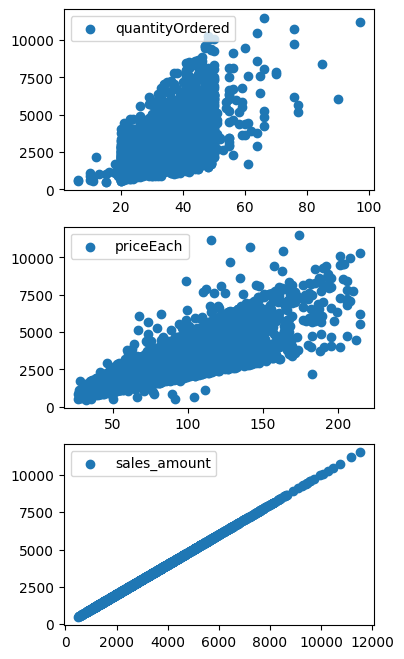

In [29]:
# Scatter Plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (4, 8))

scores = ['quantityOrdered', 'priceEach', 'sales_amount']

for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(sales_df[scores[i]], sales_df[scores[2]], label=scores[i])
    # plt.xlim(0.0, 100.0)
    plt.legend()
    
    
plt.show()


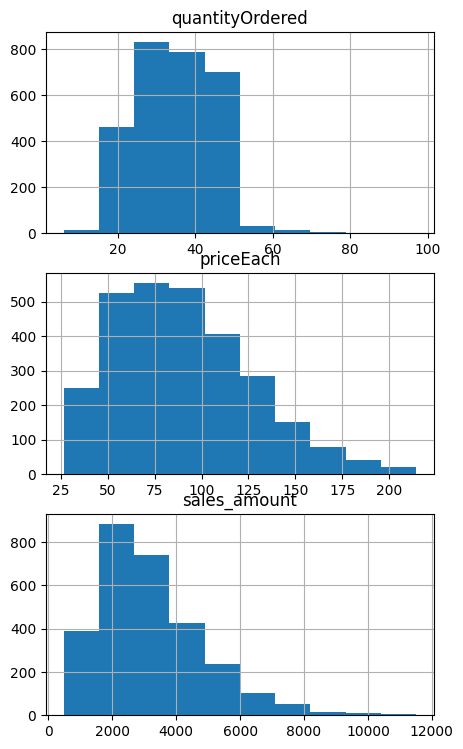

In [34]:
fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = sales_df[sc].plot(kind='hist')
    #ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()

### Payments

In [37]:
try:
    mydb = connection.connect(host="db4free.net", database = 'dbtraining2',user="dbuseracc2", passwd="Pa55w0rd",use_pure=True)
    query = "Select * from payments;"
    pay_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

pay_df

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98
...,...,...,...,...
254,495,BH167026,2003-12-26,59265.14
255,495,FN155234,2004-05-14,6276.60
256,496,EU531600,2005-05-25,30253.75
257,496,MB342426,2003-07-16,32077.44


In [39]:
pay_df.describe()

,customerNumber,amount
count,259.000000,259.000000
mean,270.779923,32419.803707
std,120.336164,20633.076867
min,103.000000,1128.200000
25%,161.000000,17195.910000
50%,250.000000,32077.440000
75%,359.500000,44989.560000
max,496.000000,120166.580000


In [41]:
pay_df.shape

(259, 4)

In [64]:
print (pay_df[pay_df.duplicated()].shape)

(0, 4)
